In [92]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
from scipy.special import binom
from scipy.misc import comb

In [15]:
fair = binom(X+Y,X) * (0.5)**(X+Y) / (binom(X+Y,X) * (0.5)**(X+Y) + 1 / (X+Y+1))

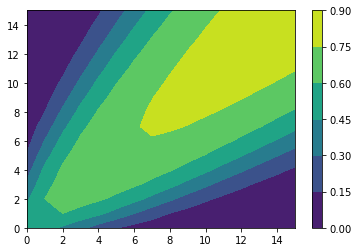

In [18]:
fig, ax = plt.subplots()
cs = ax.contourf(fair)
fig.colorbar(cs)

In [80]:
def psfd20(s,f):
    'Probability of s successes and f failures with flat distribution of modifier m'
    total = 0
    for m in range(21):
        total += (m/20)**s * (1-m/20)**f
    return (1/21) * comb(s+f,s, exact=True) * total

def chance_d20(s,f):
    return psfd20(s,f) / (psfd20(s,f) + 1 / (s+f+1))

In [105]:
def chance_d20sym(s,f):
    m = sym.Symbol('m')
    p = comb(s+f,s,exact=True) * sym.Sum(sym.Sum(m, (m, 0, 20)) , (m, 0, 20)) / sym.Integer(21)
    chance = p / (p + 1 / sym.Integer(s+f+1))
    return chance.doit()

In [98]:
chance_d20sym(1000,1000)

40983514056059689183846601684646309138372462008507754646745856579811681205903695954136949213594030226091309974063160454085233790778070541088281131470882924187045888061652756149441715594289855410676494581169063205855196266471559677304351176884515391778520330299384977268432742237498847425738115894380574761820893089750571878358120994245054744303348853746282234494181659837668518599098041261337975304562545025638741344652792640306638968002253087694213950487618013904452252986923673926531931734680348457906535237014634516423228524347718752740034839271235263027201244469553470886049781290624446619462893891200/4098351405605968918384660168464630913837246200850775464674585657981168120590369595413694921359403022609130997406316045408523379077807054108828113147088292418704588806165275614944171559428985541067649458116906320585519626647155967730435117688451539177852033029938497726843274223749884742573811589438057476182089308975057187835812099424505474430334885374628223449418165983766851859909804126133797

In [99]:
x = np.arange(1,1250,1)
S, F = np.meshgrid(x,x)
d20Land = chance_d20sym(S,F)

TypeError: only size-1 arrays can be converted to Python scalars

In [104]:
d20Land


array([[0.90909091, 0.95238095, 0.96774194, ..., 0.99932019, 0.99932478,
        0.99932931],
       [0.95238095, 0.98360656, 0.99173554, ..., 0.9999954 , 0.99999547,
        0.99999553],
       [0.96774194, 0.99173554, 0.99667774, ..., 0.99999994, 0.99999994,
        0.99999994],
       ...,
       [0.99932019, 0.9999954 , 0.99999994, ..., 1.        , 1.        ,
        1.        ],
       [0.99932478, 0.99999547, 0.99999994, ..., 1.        , 1.        ,
        1.        ],
       [0.99932931, 0.99999553, 0.99999994, ..., 1.        , 1.        ,
        1.        ]])

In [106]:
x = np.arange(1,150,1)
d20Land = np.zeros([len(x), len(x)])
for i in range(len(x)):
    for j in range(len(x)):
        d20Land[i,j] = chance_d20sym(i,j)

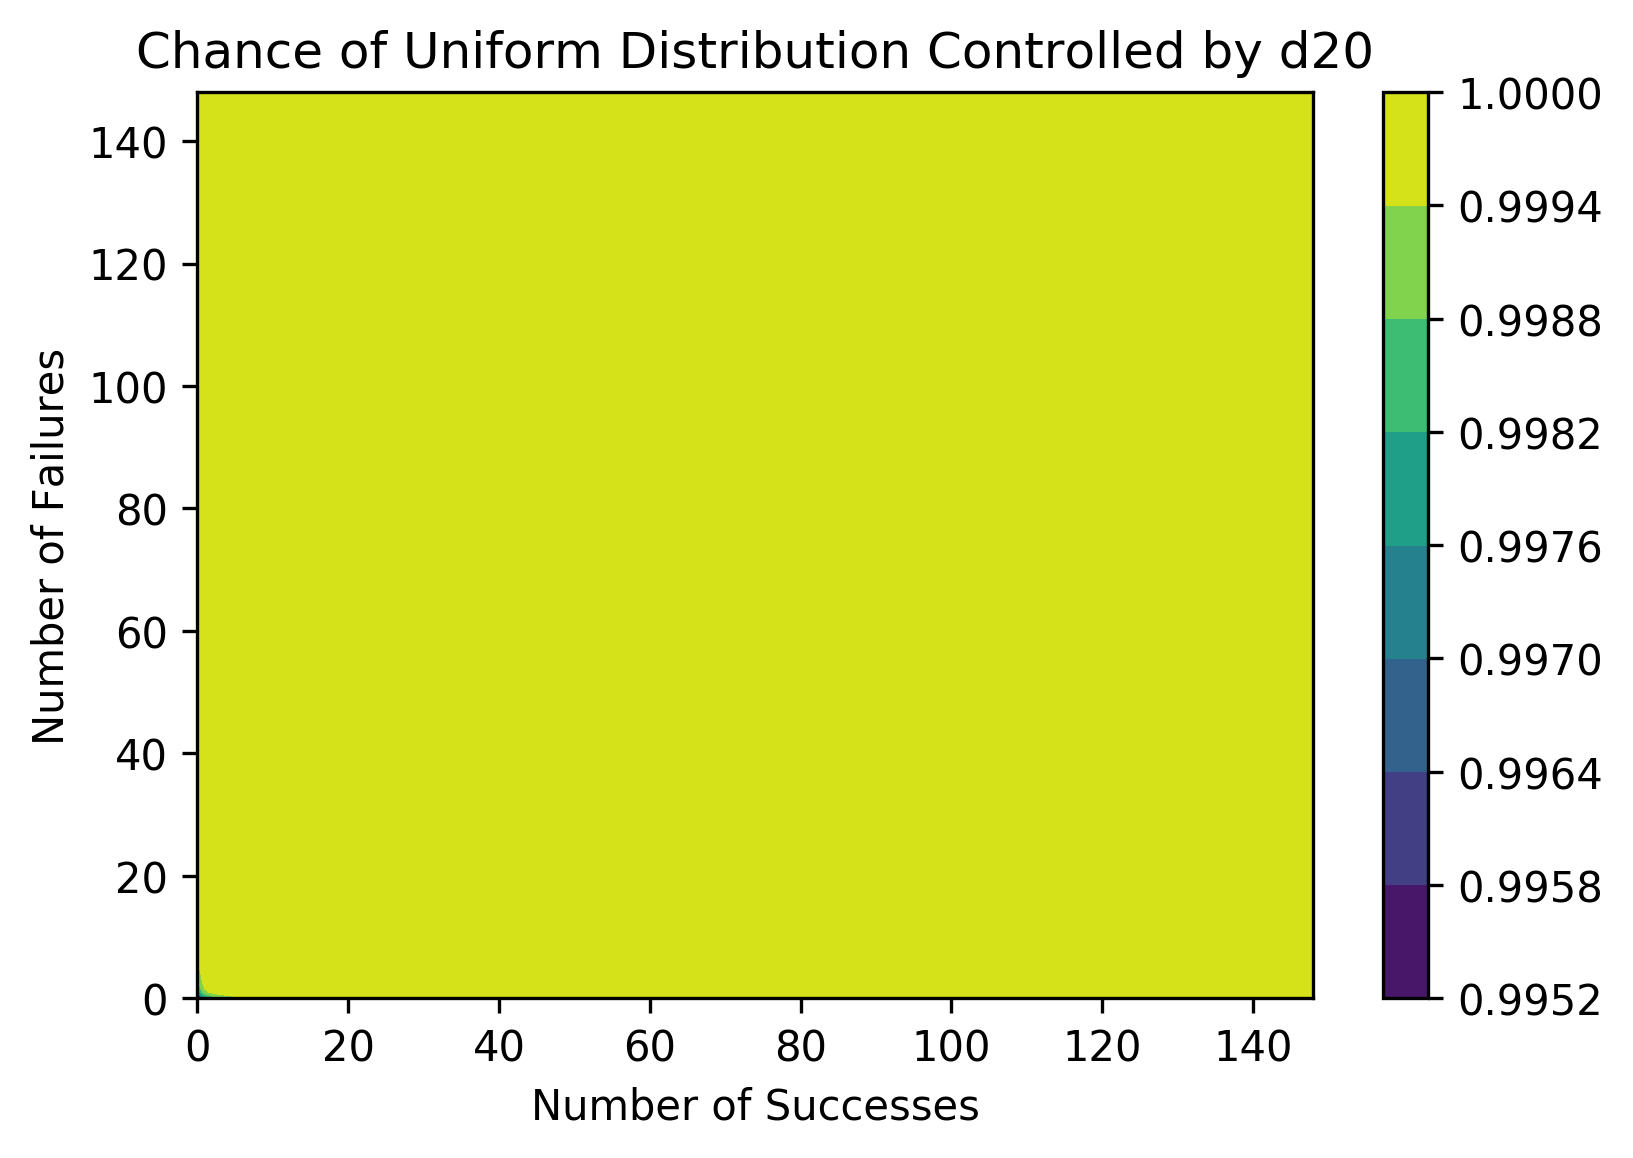

In [107]:
fig, ax = plt.subplots(dpi=300)
cs = ax.contourf(d20Land)
fig.colorbar(cs)
ax.set_title("Chance of Uniform Distribution Controlled by d20")
ax.set_xlabel("Number of Successes")
ax.set_ylabel("Number of Failures")

In [49]:
n = 1000
s = 0.78 * n
f = n - s
chance_d20(s,f)

0.3553121645316462

In [86]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [84]:
x

array([   1,    2,    3, ..., 1247, 1248, 1249])

In [72]:
chance_d20(1000,1000)

/home/cjordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


nan

In [73]:
np.inf/np.inf

nan